In [43]:
import cv2

In [44]:
frozen_model = '../input/object-detection-opencv/Object Dtection OpenCV/frozen_inference_graph.pb'
config_file = '../input/object-detection-opencv/Object Dtection OpenCV/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5, 127.5, 127.5)) 
model.setInputSwapRB(True)

<dnn_Model 0x7ff692ca9fd0>

In [45]:
classlabels = []
file_name = '../input/object-detection-opencv/Object Dtection OpenCV/coco.names'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

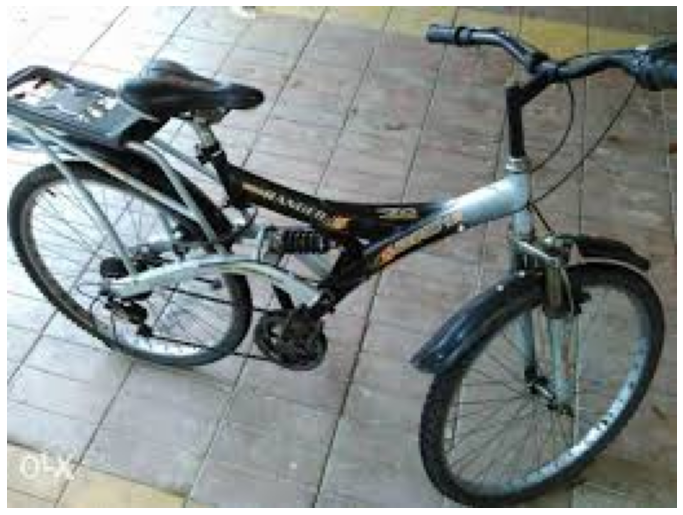

In [48]:
import matplotlib.pyplot as plt

img = cv2.imread('../input/cyclefig/cycle.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
#plt.show()
plt.savefig("cycle_detection.png", dpi=400, bbox_inches='tight')

In [49]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [50]:
print(confidence)

[0.7133288]


In [51]:
print(bbox)

[[ 10   5 248 188]]


In [52]:
print(ClassIndex)

[2]


In [53]:
print(classlabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [54]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

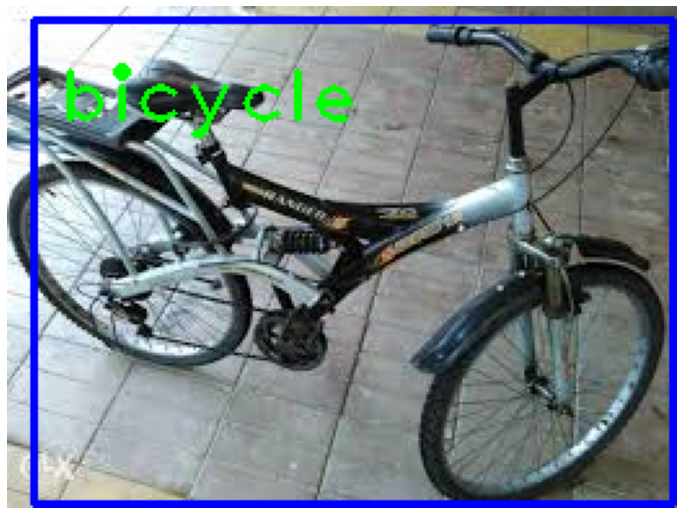

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
#plt.show()
plt.savefig("cycle_detection_2.png", dpi=400, bbox_inches='tight')